nb_header_exercises_solutions.drawio.svg

# Time Series  |   Part II: Preprocessing and Analysis


This notebook contains exercises related to:
1. Data Loading & Exploration
2. Handling Missing Values
4. Trend, Seasonality & Stationarity Analysis

## Installing dependencies

In [1]:
# --- Saving as pdf libraries
#! pip install pypandoc
#! pip install pandoc
#! apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic
#!apt-get install pandoc
#! pip install fastkaggle

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 7.7 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.4-py3-none-any.whl size=34792 sha256=6e6a1071944535c53009b7e2fa8e6a41027c51c659227a5d414e09bcfb8f0955
  Stored in directory: /root/.cache/pip/wheels/4f/d7/32/c6c9b7b05e852e920fd72174487be3a0f18e633a7adcc303be
Successfully built pandoc
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcommons-logging-java libcommons-parent-java
  libfontbox-java libfontenc1 libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libkpathsea6
  libpdfbox-java libptexenc1 libruby3.0 libsynctex2 libteckit0 libtexlua53 libtexluajit2 libwoff1
  libzzip-0-13 lmodern poppler-data preview-latex-style rake ruby ruby-net-telnet

## Data Loading and exploration

### Exercise I: Load a public time series dataset
For the dataset **[Hourly energy demand generation and weather](https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather)**

1) Download de file ( using Kaggle's API or pressing the download button )

2) Load the dataset. Ensure that the dataset loads correctly, checking column names and date parsing.

In [2]:
import pandas as pd
import fastkaggle

In [3]:
! mkdir -p ~/.kaggle
! mv ./kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json
api = fastkaggle.import_kaggle()

In [4]:
#url = "https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather"
local_data_path = "./data"
dataset_slug = "nicholasjhana/energy-consumption-generation-prices-and-weather"
fastkaggle.get_dataset(
    dataset_slug=dataset_slug,
    dataset_path=local_data_path,
    unzip=True,
    force=True
  )
! ls {local_data_path}

Dataset URL: https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather
dataset-metadata.json  energy_dataset.csv  weather_features.csv


In [5]:
file_path = f"{local_data_path}/energy_dataset.csv"  # Modify if necessary
df = pd.read_csv(file_path, parse_dates=["time"], index_col="time")
df.head()


,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,NaN,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,NaN,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,NaN,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,NaN,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,NaN,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


## Handling missing values

1) Ensure the dataset is evenly spaced

2) Check how many missing values are there and try different missing imputation methods to complete those values. Plot the original series and the obtained one to check how well did each method works better for each feature.

In [6]:
import numpy as np

In [7]:
# 1. Check Evenly Spaced
# Ensure Index dtype
print(f"Check original type: {df.index.dtype}")
type(f"Check the first value: {df.index[0]} | {type({df.index[0]})}")
# Ensure timestamps
df.index = pd.to_datetime(df.index, utc=True)
print(df.index.dtype)
print(df.index[0])

Check original type: object
datetime64[ns, UTC]
2014-12-31 23:00:00+00:00


In [8]:
# Check for missing values
df.isnull().sum()

,0
generation biomass,19
generation fossil brown coal/lignite,18
generation fossil coal-derived gas,18
generation fossil gas,18
generation fossil hard coal,18
generation fossil oil,19
generation fossil oil shale,18
generation fossil peat,18
generation geothermal,18
generation hydro pumped storage aggregated,35064


## Use only the first feature (you can check the others too, we're playing with it)

In [10]:
df_first = df[[df.columns[0]]]

In [13]:
display(df_first.head())
print(df_first.shape)

,generation biomass
time,
2014-12-31 23:00:00+00:00,447.0
2015-01-01 00:00:00+00:00,449.0
2015-01-01 01:00:00+00:00,448.0
2015-01-01 02:00:00+00:00,438.0
2015-01-01 03:00:00+00:00,428.0


(35064, 1)


A first look

In [15]:
import matplotlib.pyplot as plt

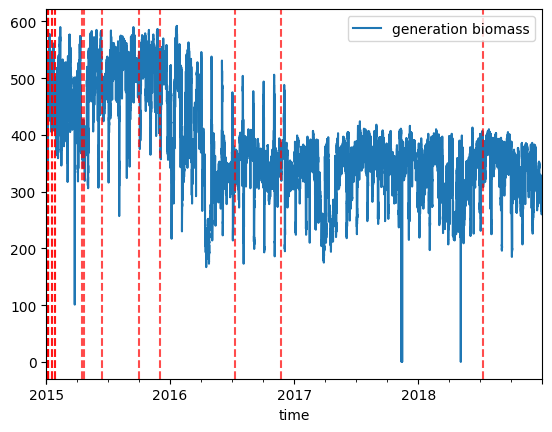

In [22]:
def plot_with_nans(df):
  df.plot()
  nan_positions = df[df.isna().any(axis=1)].index
  for pos in nan_positions:
      plt.axvline(x=pos, color='red', linestyle='--', alpha=0.7)
  plt.show()
plot_with_nans(df_first)

Añadamos una máscara de NaNs para tener un control adicional con MSE como en teoría

In [18]:
missing_mask = np.random.random(df_first.shape) < 0.01
mv_dataset = df_first.mask(missing_mask, other=pd.NA)

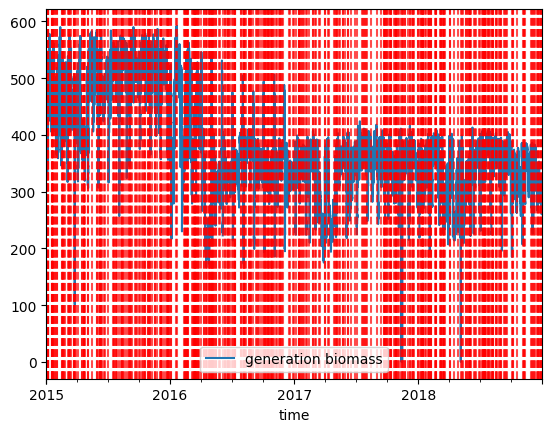

In [23]:
plot_with_nans(mv_dataset)

Vamos a hacer la prueba con Rolling mean, fill forward e interpolación

In [24]:
mv_dataset.head()

,generation biomass
time,
2014-12-31 23:00:00+00:00,447.0
2015-01-01 00:00:00+00:00,449.0
2015-01-01 01:00:00+00:00,448.0
2015-01-01 02:00:00+00:00,438.0
2015-01-01 03:00:00+00:00,428.0


In [64]:
# Apply rolling mean (window=50)
colname = mv_dataset.columns[0]
technique = "rolling_mean"
mv_dataset[f"{colname}_imputed_{technique}"] = mv_dataset[colname].fillna(
  mv_dataset[colname].rolling(window=50, min_periods=1).mean()
)

In [52]:
def plot_filled(df, mv_dataset, missing_mask, colname, technique):
    nan_indices = np.where(missing_mask)[0]
    plt.figure(figsize=(12, 6))

    # Reference line
    plt.plot(df.index, df[colname], color="gray", alpha=0.3, label="Reference Line")

    # Scatter plot for original data
    plt.scatter(df.index[~missing_mask.flatten()], df[colname][~missing_mask.flatten()],
                label="Original Data", color="blue", marker='o', s=10, alpha=0.6)

    # Ensure mv_dataset has the same index as df
    #mv_dataset_aligned = mv_dataset.loc[df.index]

    # Scatter plot for imputed values (only missing values)
    plt.scatter(df.index[missing_mask.flatten()], mv_dataset[f"{colname}_imputed"][missing_mask.flatten()],
            label="Imputed Data", color="green", marker='o', s=40, alpha=0.8)

    plt.title(f"High Volatility Data: Original vs Imputed ({technique})")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

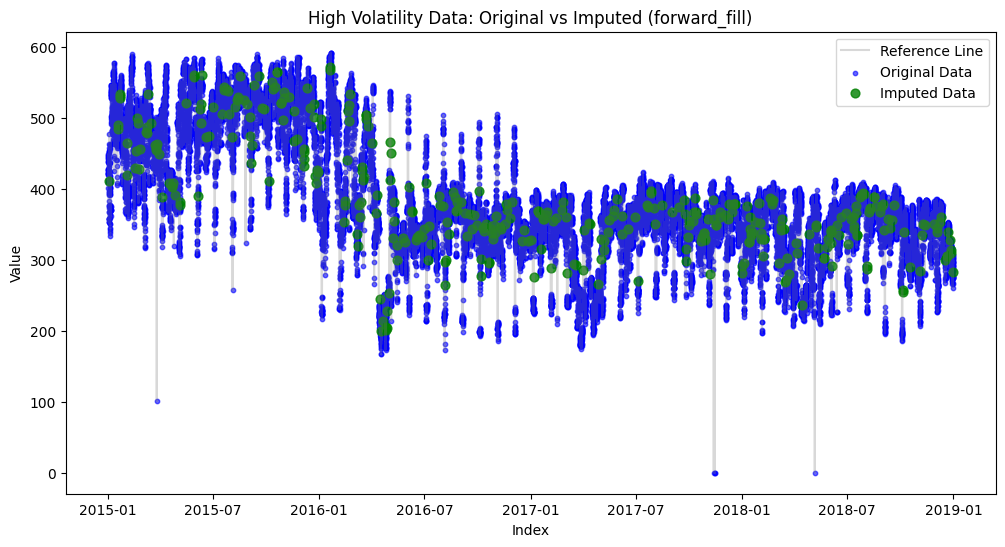

In [53]:
plot_filled(df_first, mv_dataset, missing_mask, colname, technique)

In [65]:
# Evaluate if the imputation method is adequate
mae_rolling = np.mean(np.abs(df_first[colname] - mv_dataset[f"{colname}_imputed_{technique}"]))
print(f"Mean Absolute Error (MAE) between Original and {technique} Imputed Data: {mae_rolling}")

Mean Absolute Error (MAE) between Original and rolling_mean Imputed Data: 0.2417797040210924


Ahora con Forward fill

<ipython-input-66-da2e9e9359ad>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mv_dataset[colname_mod] = mv_dataset[colname].fillna(method = "ffill")


generation biomass_imputed_forward_fill
time
2014-12-31 23:00:00+00:00    447.0
2015-01-01 00:00:00+00:00    449.0
2015-01-01 01:00:00+00:00    448.0
2015-01-01 02:00:00+00:00    438.0
2015-01-01 03:00:00+00:00    428.0
                             ...  
2018-12-31 18:00:00+00:00    297.0
2018-12-31 19:00:00+00:00    296.0
2018-12-31 20:00:00+00:00    292.0
2018-12-31 21:00:00+00:00    293.0
2018-12-31 22:00:00+00:00    290.0
Name: generation biomass_imputed_forward_fill, Length: 35064, dtype: float64


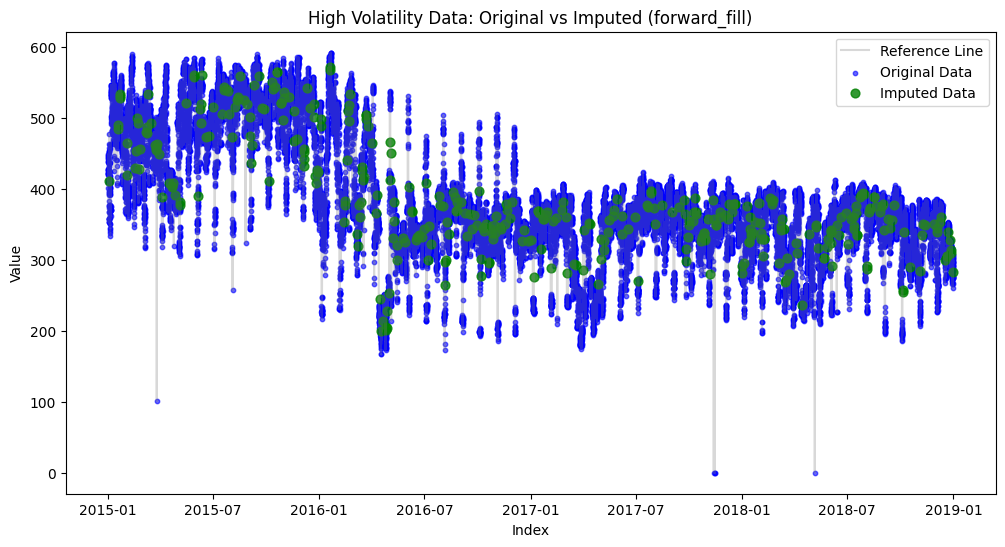

Mean Absolute Error (MAE) between Original and forward_fill Imputed Data: 0.06794121843344271
Rolling mean: 0.2417797040210924 | FF: 0.06794121843344271


In [66]:
technique = "forward_fill"
colname_mod = f"{colname}_imputed_{technique}"
mv_dataset[colname_mod] = mv_dataset[colname].fillna(method = "ffill")
print(colname_mod)
print(mv_dataset[colname_mod])
plot_filled(df_first, mv_dataset, missing_mask, colname, technique)
mae_ff = np.mean(np.abs(df_first[colname] - mv_dataset[f"{colname}_imputed_{technique}"]))
print(f"Mean Absolute Error (MAE) between Original and {technique} Imputed Data: {mae_ff}")
print(f"Rolling mean: {mae_rolling} | FF: {mae_ff}")

¡Mucho mejor!

generation biomass_imputed_interpolate
time
2014-12-31 23:00:00+00:00    447.0
2015-01-01 00:00:00+00:00    449.0
2015-01-01 01:00:00+00:00    448.0
2015-01-01 02:00:00+00:00    438.0
2015-01-01 03:00:00+00:00    428.0
                             ...  
2018-12-31 18:00:00+00:00    297.0
2018-12-31 19:00:00+00:00    296.0
2018-12-31 20:00:00+00:00    292.0
2018-12-31 21:00:00+00:00    293.0
2018-12-31 22:00:00+00:00    290.0
Name: generation biomass_imputed_interpolate, Length: 35064, dtype: float64


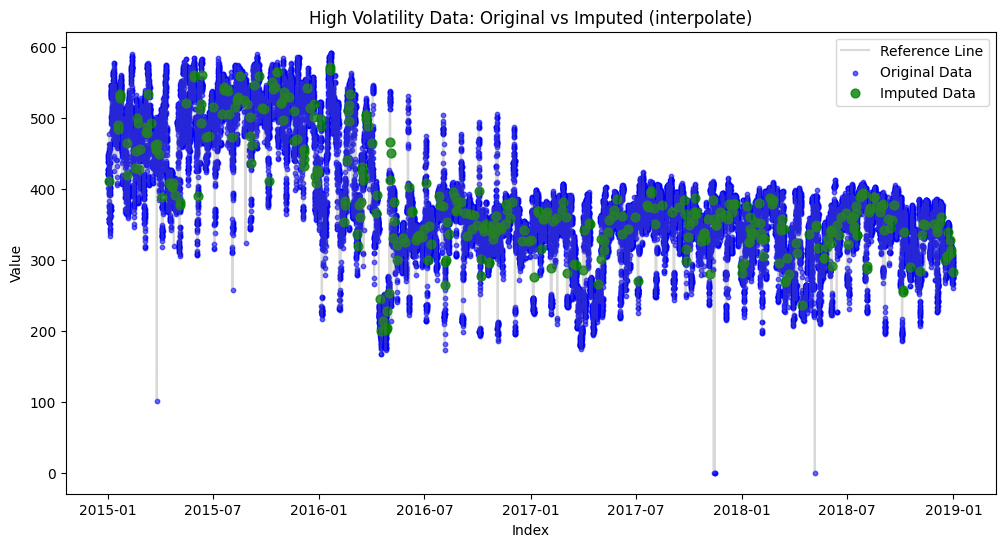

Mean Absolute Error (MAE) between Original and interpolate Imputed Data: 0.05107243068435821
Rolling mean: 0.2417797040210924 | FF: 0.06794121843344271 | Interp: 0.05107243068435821


In [67]:
technique = "interpolate"
colname_mod = f"{colname}_imputed_{technique}"
mv_dataset[colname_mod] = mv_dataset[colname].interpolate()
print(colname_mod)
print(mv_dataset[colname_mod])
plot_filled(df_first, mv_dataset, missing_mask, colname, technique)
mae_interp = np.mean(np.abs(df_first[colname] - mv_dataset[f"{colname}_imputed_{technique}"]))
print(f"Mean Absolute Error (MAE) between Original and {technique} Imputed Data: {mae_interp}")
print(f"Rolling mean: {mae_rolling} | FF: {mae_ff} | Interp: {mae_interp}")

Tenemos un claro ganador: la interpolación. Dejamos como valor correcto el de dicha variable para el resto del notebook.

In [69]:
mv_dataset.columns

Index(['generation biomass', 'generation biomass_imputed',
       'generation biomass_imputed_rolling_mean',
       'generation biomass_imputed_forward_fill',
       'generation biomass_imputed_interpolate'],
      dtype='object')

In [72]:
df_final = mv_dataset[['generation biomass_imputed_interpolate']]
df_final.rename(columns={'generation biomass_imputed_interpolate': 'value'}, inplace=True)

<ipython-input-72-f91bfcd1ff2d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.rename(columns={'generation biomass_imputed_interpolate': 'value'}, inplace=True)


In [73]:
df_final.head()

,value
time,
2014-12-31 23:00:00+00:00,447.0
2015-01-01 00:00:00+00:00,449.0
2015-01-01 01:00:00+00:00,448.0
2015-01-01 02:00:00+00:00,438.0
2015-01-01 03:00:00+00:00,428.0


## Trend and seasonality analysis
For the variate `price_actual` (and some other you see interesting):

1) Perform seasonal decomposition

2) Plot the descomposition. Is there a clear trend/seasonality? Does the time series seem to be stationarity in mean or variance or both of them?

3) Use the tests in the guided lesson notebook (one for each thing) to detect the presence of trend, seasonality and stationarity.

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

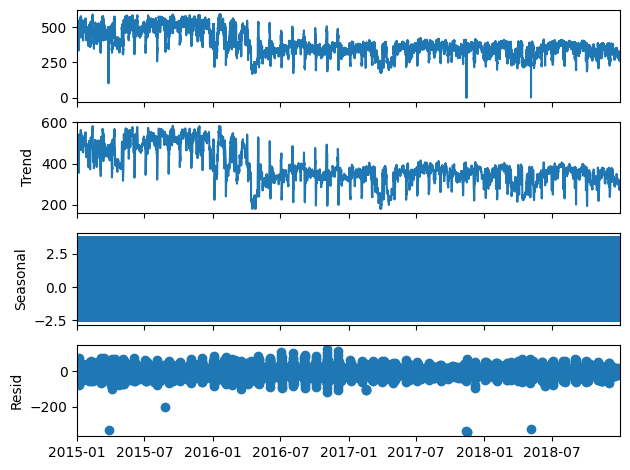

In [76]:
result = seasonal_decompose(df_final, model='additive', period=12)
result.plot()
plt.show()

Nada en claro. Ninguna tendencia aparente. Probemos con los tests.

In [79]:
from scipy.stats import kendalltau
from sklearn.linear_model import LinearRegression

In [81]:
def check_trend(df, colname):
  # 1. Prueba de Mann-Kendall para detectar tendencia global
  tau, p_value = kendalltau(df.index.factorize()[0], df[colname])
  print(f"Mann-Kendall Test: tau = {tau:.3f}, p-value = {p_value:.5f}")

  if p_value < 0.05:
      if tau > 0:
          print("🔼 Tendencia globalmente AL ALZA")
      else:
          print("🔽 Tendencia globalmente A LA BAJA")
  else:
    print("⚠️ No se detecta tendencia significativa")

In [82]:
check_trend(df_final, "value")

Mann-Kendall Test: tau = -0.379, p-value = 0.00000
🔽 Tendencia globalmente A LA BAJA


Cierto es que si volvemos arriba hay una pequeña tendencia a la baja, nada relevante. Pero es útil el test para verlo.

Seasonality

In [83]:
def check_seasonality(df, colname):
  # Perform seasonal decomposition to extract trend, seasonality, and residual components
  decomposed = seasonal_decompose(df[colname], model='additive', period=365)

  # Plot the decomposition components
  fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)
  decomposed.observed.plot(ax=axes[0], title="Original Series", color="black")
  decomposed.trend.plot(ax=axes[1], title="Trend", color="blue")
  decomposed.seasonal.plot(ax=axes[2], title="Seasonality", color="green")
  decomposed.resid.plot(ax=axes[3], title="Residual (Noise)", color="red")

  plt.tight_layout()
  plt.show()


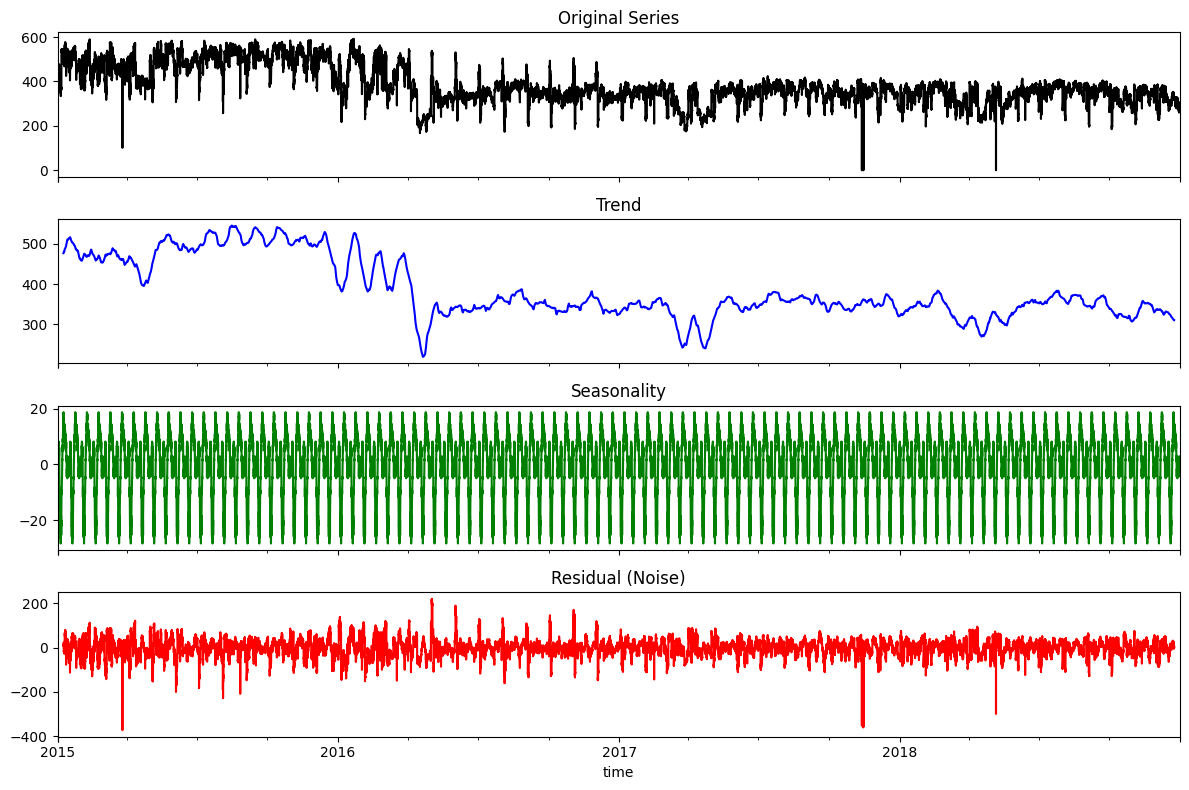

In [85]:
check_seasonality(df_final, "value")

De nuevo, no se observa seasonalidad

### Estacionareidad en media

In [87]:
# ======== Mean Stationarity Analysis (Trend Stationarity) ========
# Evaluates whether the mean of the time series remains constant over time.

from statsmodels.tsa.stattools import adfuller, kpss
def check_stationarity(df, colname):
  # Augmented Dickey-Fuller (ADF) Test - checks if the series has a unit root (trend non-stationarity)
  adf_test = adfuller(df[colname].dropna())
  print(f"ADF Test: p-value = {adf_test[1]}")
  if adf_test[1] < 0.05:
      print("✅ The series is stationary in mean (reject H0).")
  else:
      print("❌ The series is NOT stationary in mean (fail to reject H0, presence of a trend).")

  # KPSS Test - checks if the series is trend-stationary (H0: Stationary in mean)
  kpss_test = kpss(df[colname].dropna(), regression='c', nlags="auto")
  print(f"KPSS Test: p-value = {kpss_test[1]}")
  if kpss_test[1] < 0.05:
      print("❌ The series is NOT stationary in mean (reject H0, presence of a trend).")
  else:
      print("✅ The series is stationary in mean (fail to reject H0).")

In [88]:
check_stationarity(df_final, "value")

ADF Test: p-value = 2.274681646738849e-11
✅ The series is stationary in mean (reject H0).
KPSS Test: p-value = 0.01
❌ The series is NOT stationary in mean (reject H0, presence of a trend).


<ipython-input-87-5691adbba463>:15: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = kpss(df[colname].dropna(), regression='c', nlags="auto")


Como predecíamos al ver la media, la serie apenas tiene tendencia, es estacionaria en media según un test, pero no segun el otro porque detecta esa leve bajada.
¿Y en varianza?

In [89]:
# ======== Variance Stationarity Analysis (Homoscedasticity) ========
# Evaluates whether the variance of the time series remains constant over time.

from statsmodels.stats.diagnostic import het_arch
p_threshold = 0.05 # Usually 0.05
# ARCH Test - checks for heteroscedasticity (variance changes over time)
arch_test = het_arch(df_final["value"].dropna())

print(f"ARCH Test: p-value = {arch_test[1]}")
if arch_test[1] < p_threshold:
    print("❌ The series is NOT stationary in variance (heteroscedasticity detected).")
else:
    print("✅ The series is stationary in variance (fail to reject H0, homoscedasticity).")

ARCH Test: p-value = 0.0
❌ The series is NOT stationary in variance (heteroscedasticity detected).


Como muestra el test, la serie no es estacionaria en varianza, lo que se ve en la modificación de la amplitud de la misma a lo largo del tiempo.


## Save to pdf file

In [ ]:
from google.colab import drive
from google.colab import files
drive.mount("/content/drive")
nbs_path =  '/content/drive/MyDrive/SERTEMP-Collab'
nbs_name = '01_Introduction'
! ls {nbs_path}/{nbs_name}.ipynb
!jupyter nbconvert --to PDF {nbs_path}/{nbs_name}.ipynb --output /{nbs_path}/{nbs_name}.pdf
files.download(f'{nbs_path}/{nbs_name}.pdf')

📖 **To be continued...**